# Digit Recognizer(Kaggle Competition)

# Contents
* Preconfiguration
* Preprocessing
   * Loading Images
   * Transformation & Labeling
   * Checking For Balance Data
   * Remove Outliers 
   * Remove Equal Images
   * Normalization
   * Augmentation
* Model Creation
* Training
* Evaluation

## Preconfiguration

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python import keras as K

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\deeplearning\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_root = 'data'
train_file = os.path.join(data_root,'train.csv')
test_file = os.path.join(data_root,'test.csv')
img_shape = (28,28)

## Preprocessing

### Loading Images

In [3]:
tmp_train = pd.read_csv(train_file)
tmp_test = pd.read_csv(test_file)

In [4]:
tmp_train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35842,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9302,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5943,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tmp_test.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transformation & Labeling

In [6]:
def tranfrom_to_image_shape(data,shape) :
    data = np.array(data)
    img_data = np.ndarray((data.shape[0],shape[0],shape[1]))
    for i,img in enumerate(data) :
        for j,pixel in enumerate(img) :
            img_data[i,int(j/shape[0]),int(j%shape[1])] = pixel
    return img_data
tmp_img_train = tranfrom_to_image_shape(tmp_train.drop('label',axis=1),img_shape)
tmp_img_test = tranfrom_to_image_shape(tmp_test,img_shape)
labels = tmp_train['label']

Making Sure That transformation and labeling are working fine

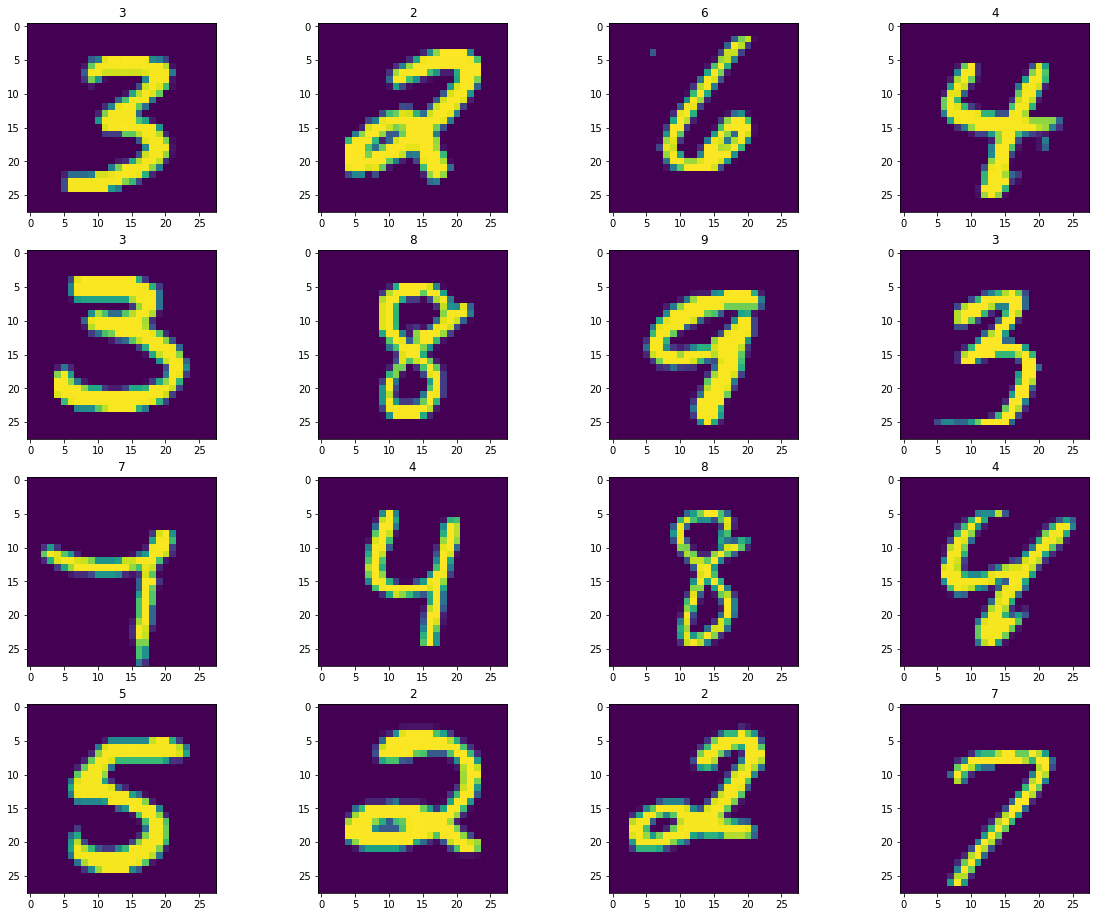

In [9]:
def img_random_visualization(imgs,labels) :
    f,ax = plt.subplots(4,4,figsize=(20,16))
    for i in ax :
        for j in i :
            rnd = np.random.randint(imgs.shape[0])
            j.set_title(labels[rnd])
            j.imshow(imgs[rnd])
img_random_visualization(tmp_img_train,labels)

## Checking For Balance Data